

The main objective of this part is to predict the probability of a movie being successful, allowing the movie recommendation system to determine whether a movie will be successful or not with new viewers.
To achieve this, the system will be using two predictive models: A logistic regression and a classification tree in order to get the most accurate predictions with respect to the ROC AUC score and highest area under the curve.
The final selected model will predict which movie titles will be successful. In other words, titles that are most favorable to get high overall ratings and positive reviews based on the historical data of 300,000 movies that were scraped on IMDB. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Movies-IMDB-Partitionned.csv to Movies-IMDB-Partitionned.csv


In [ ]:
# Analyzing the movie historical data using Pandas library
# Naming the scraped movie dataset to MovieData_0
import pandas as pd

MovieData = pd.read_csv('Movies-IMDB-Partitionned.csv')
#MovieData_0 = pd.read_csv('/Users/hamidoumaiga/pythonProject/Movie Review Web Analytics/Movies--IMDB.csv')
print(MovieData.columns)

Index(['movieID', 'userRating', 'review', 'userID', 'url', 'movieName',
       'movieCertification', 'movieRuntime', 'movieGenre', 'movieOveralRating',
       'Action', 'Drama', 'Thriller', 'Crime', 'Adventure', 'Comedy',
       'Romance', 'Fantasy', 'Horror', 'Western', 'War', 'Mystery', 'History',
       'Family', 'Animation', 'Sport', 'Music', 'Biography', 'Musical',
       'Sci-Fi'],
      dtype='object')


In [ ]:
MovieData.describe()

,movieID,userRating,userID,movieOveralRating,Action,Drama,Thriller,Crime,Adventure,Comedy,Romance,Fantasy,Horror,Western,War,Mystery,History,Family,Animation,Sport,Music,Biography,Musical,Sci-Fi
count,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000,22793.000000
mean,5101.088624,6.965165,127945.803712,6.562094,0.230992,0.564252,0.114289,0.137323,0.183741,0.333523,0.170184,0.075637,0.105120,0.054183,0.049533,0.083842,0.069188,0.068398,0.052560,0.088404,0.000614,0.112315,0.055499,0.064011
std,2949.817283,2.829562,74896.684341,1.019205,0.421477,0.495865,0.318170,0.344195,0.387281,0.471482,0.375802,0.264423,0.306715,0.226384,0.216982,0.277156,0.253779,0.252434,0.223158,0.283888,0.024776,0.315761,0.228958,0.244778
min,1.000000,1.000000,1.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2582.000000,5.000000,63186.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,8.000000,127055.000000,6.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7664.000000,9.000000,192765.000000,7.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10207.000000,10.000000,258797.000000,9.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Missing Values could occur when no information is provided for rows or columns of the IMBD movie dataset. Missing Data would be a problem for our model since it could lead to inaccurate predictions.

# **Data Exploration**

In [ ]:
#Looking for Missing values or Nulls
print(MovieData.isnull().sum())

movieID               0
userRating            0
review                0
userID                0
url                   0
movieName             0
movieCertification    0
movieRuntime          0
movieGenre            0
movieOveralRating     0
Action                0
Drama                 0
Thriller              0
Crime                 0
Adventure             0
Comedy                0
Romance               0
Fantasy               0
Horror                0
Western               0
War                   0
Mystery               0
History               0
Family                0
Animation             0
Sport                 0
Music                 0
Biography             0
Musical               0
Sci-Fi                0
dtype: int64


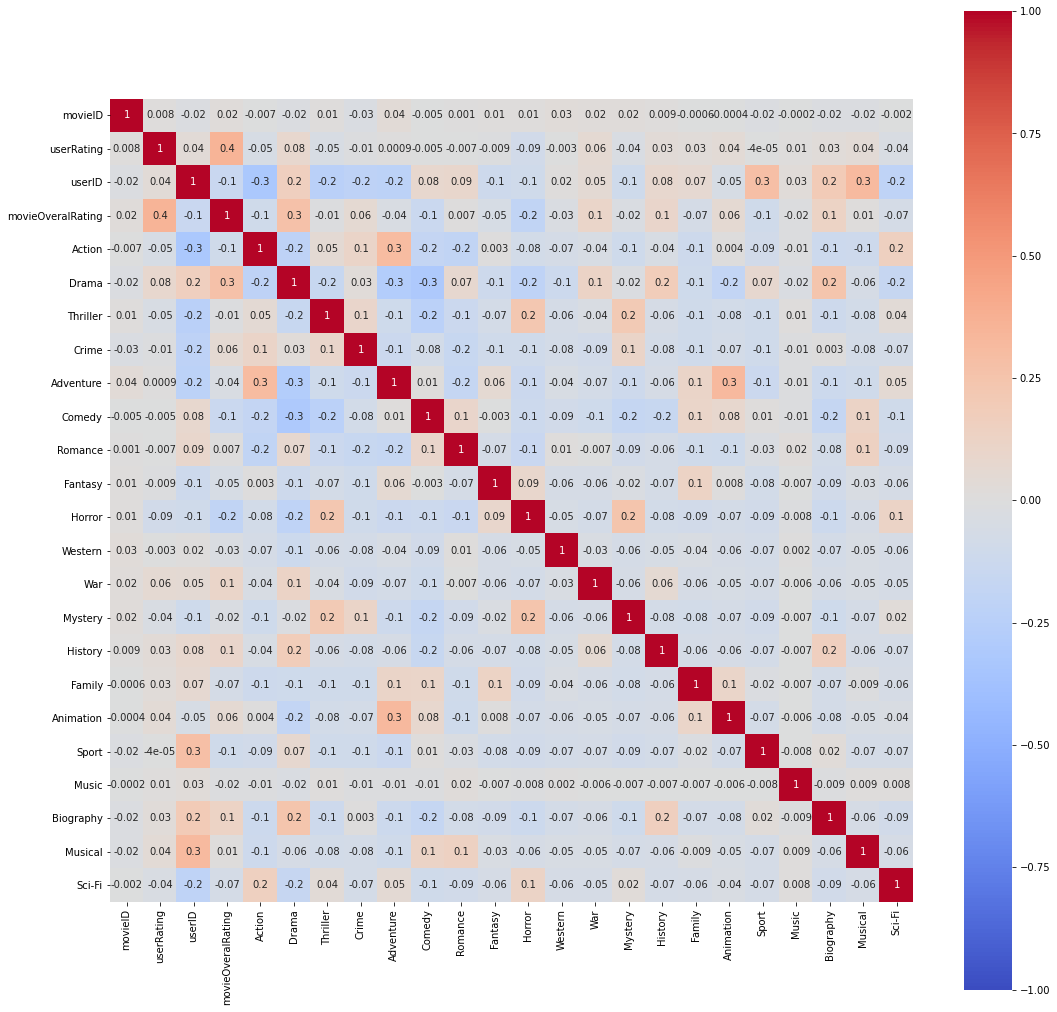

In [ ]:
# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,18))
sns.heatmap(MovieData.corr(),
            annot=True,
            square=True,
            robust=True,
            fmt='.1g',
           center=0,
           vmin=-1,
           vmax=1,
           cmap='coolwarm')

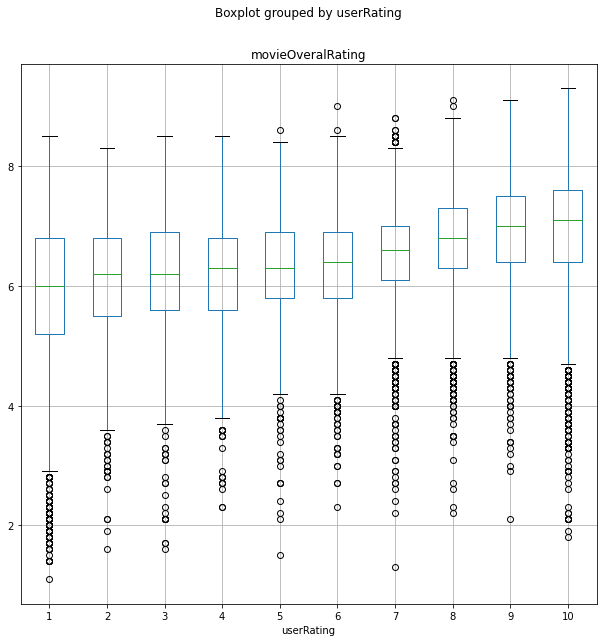

In [ ]:
# Scatter plotting the highest correlated variables

y_var  = 'movieOveralRating'
x_var = 'userRating'
MovieData.boxplot(column=y_var, by=x_var, figsize = (10,10))

The movie industry is a highly competitive market and the goal of this project is to recommend successful movie titles. I will define a movie title as successful when it has a rating above 8.
Recommending movies with a rating above 8.0 points out of 10 points would be considered a high-quality outcome, therefore i will focus this model on predicting the probability of a movie title achieving a rating above 8.0 rating points. 
Titles in this category would have a better chance of realizing a positive evaluation.

[6.7 4.9 6.4 7.3 8.1 6.9 4.6 6.5 6.3 7.4 4.3 6.1 7.6 4.4 6.8 7.8 5.1 6.2
 5.8 3.6 5.5 4.7 6.  8.  7.  5.3 8.4 7.1 7.2 6.6 7.5 5.9 7.9 7.7 4.5 8.2
 2.1 5.6 5.  5.4 3.8 8.8 4.8 3.9 5.2 9.  5.7 2.7 3.  8.5 1.9 3.1 2.6 8.3
 2.2 4.  8.9 8.7 3.7 4.2 3.3 1.1 3.5 3.4 2.5 1.7 8.6 2.3 1.8 2.4 1.3 4.1
 3.2 2.9 1.4 1.5 2.8 2.  9.3 9.1 1.6 9.2]


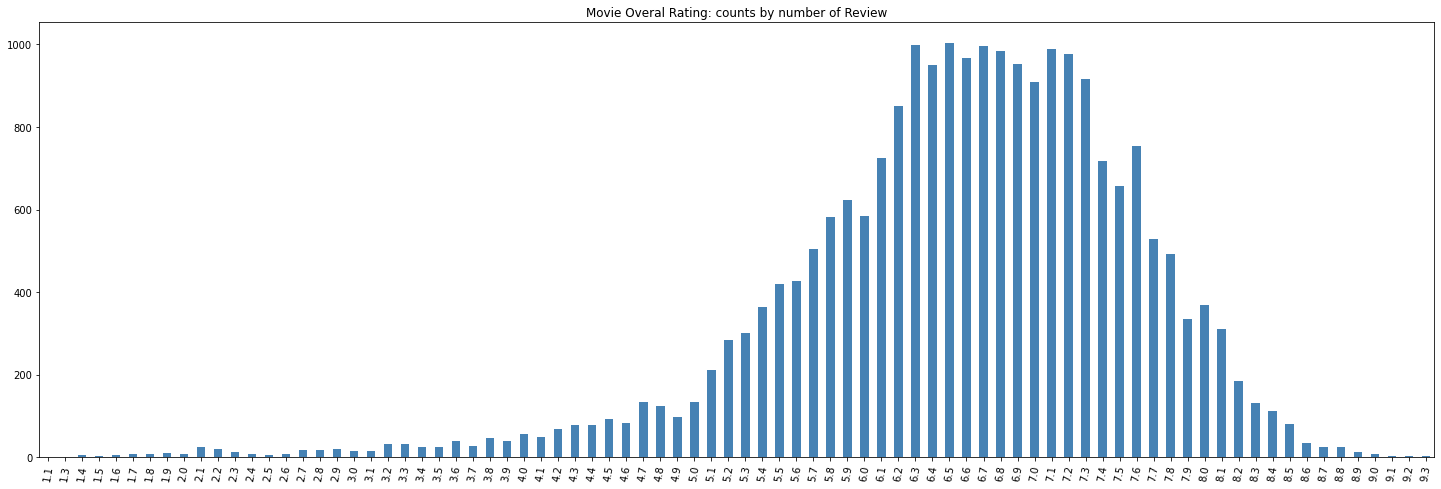

In [ ]:
# Checking dataset for unique overall rating 
print(MovieData['movieOveralRating'].unique())

ax = MovieData['movieOveralRating'].value_counts().sort_index().plot.bar(figsize=(25, 8), color="steelblue", rot=80)
ax.title.set_text('Movie Overal Rating: counts by number of Review')

[0 1]


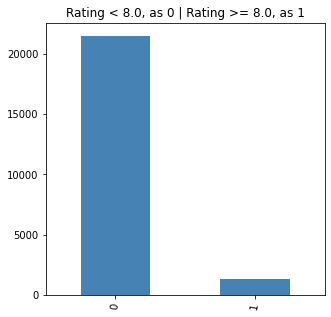

In [ ]:
# Defining Review Overall to 1 and 0 based on our objective:
# Our event of interest happens when a rating is greater than 8.0, coded as 1. 
# Else, our event of interest does not happen such that a rating is less than 8.0, coded as 0. 

MovieData1 = MovieData.copy()
MovieData1['movieOveralRating']= (MovieData['movieOveralRating'] >= 8.0).astype(int)

print(MovieData1['movieOveralRating'].unique())
ax = MovieData1['movieOveralRating'].value_counts().sort_index().plot.bar(figsize=(5, 5), color="steelblue", rot=80)
ax.title.set_text('Rating < 8.0, as 0 | Rating >= 8.0, as 1')

In [ ]:
MovieData1.columns

Index(['movieID', 'userRating', 'review', 'userID', 'url', 'movieName',
       'movieCertification', 'movieRuntime', 'movieGenre', 'movieOveralRating',
       'Action', 'Drama', 'Thriller', 'Crime', 'Adventure', 'Comedy',
       'Romance', 'Fantasy', 'Horror', 'Western', 'War', 'Mystery', 'History',
       'Family', 'Animation', 'Sport', 'Music', 'Biography', 'Musical',
       'Sci-Fi'],
      dtype='object')

In [ ]:
# Columns to Drop for now because they are not relevant in this predictions model
# Remove variable list = rvar_list

MovieData2 = MovieData1.copy()
rvar_list =['movieID', 'userRating', 'review', 'userID', 'url', 'movieCertification', 'movieRuntime']

MovieData3 = MovieData2.drop(columns=rvar_list)
print(MovieData3.columns)

Index(['movieName', 'movieGenre', 'movieOveralRating', 'Action', 'Drama',
       'Thriller', 'Crime', 'Adventure', 'Comedy', 'Romance', 'Fantasy',
       'Horror', 'Western', 'War', 'Mystery', 'History', 'Family', 'Animation',
       'Sport', 'Music', 'Biography', 'Musical', 'Sci-Fi'],
      dtype='object')


In [ ]:
# Variable Transformation

# Separating all the variables into lists for future column indexing
# One for numerical, the other for categorical 

MovieData4 = MovieData3.copy()
cvar_list = ['movieGenre', 'movieName', 'movieOveralRating']
MovieData4[cvar_list] = MovieData3[cvar_list].astype('category')


# Converting the categorical variables into dummies
MovieData5 = MovieData4.copy()
MovieData5 = pd.get_dummies(MovieData4, prefix_sep='_')

# Listing all the columns after dummy coding
list(MovieData5.columns)

['Action',
 'Drama',
 'Thriller',
 'Crime',
 'Adventure',
 'Comedy',
 'Romance',
 'Fantasy',
 'Horror',
 'Western',
 'War',
 'Mystery',
 'History',
 'Family',
 'Animation',
 'Sport',
 'Music',
 'Biography',
 'Musical',
 'Sci-Fi',
 'movieName_#Alive',
 "movieName_'71",
 "movieName_'Neath the Arizona Skies",
 "movieName_'Round Midnight",
 'movieName_(T)Raumschiff Surprise - Periode 1',
 'movieName_(Untitled)',
 'movieName_...All the Marbles',
 'movieName_1 Mile to You',
 'movieName_1,000 Times Good Night',
 'movieName_10 Cloverfield Lane',
 'movieName_10 Rillington Place',
 'movieName_10 Things I Hate About You',
 'movieName_10,000 BC',
 'movieName_100 Feet',
 'movieName_100 Meters',
 'movieName_100 Rifles',
 'movieName_101 Dalmatians',
 'movieName_102 Dalmatians',
 'movieName_11/11/11',
 'movieName_11:14',
 'movieName_12 Angry Men',
 'movieName_12 Monkeys',
 'movieName_12 Strong',
 'movieName_12 Years a Slave',
 'movieName_127 Hours',
 'movieName_13 Assassins',
 'movieName_13 Going on 3

My event of interest for the recommendation system is a title that was rated greater than 8.0, or [movieOveralRating_1]. I also have to remove User Rating that are less than 8.0 points.
After coding the categorical predictors, I will drop the dummies that corresponded to the most frequent value (in other words the mode value) of the categorical predictor in the movie dataset.

In [ ]:
# Removing the redundant dummies 
# Placeholder variable: rdummies

MovieData6 = MovieData5.copy()
rdummies = ['movieOveralRating_0']
MovieData6 = MovieData5.drop(columns=rdummies)

In [ ]:
# Part Data Partiton
MovieData7 = MovieData6.copy()

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition. For our dataset we will use 30 percent for testing.
df4partition = MovieData7
testpart_size = 0.5

# random_state specifies the seed for random number generator. 
# random_state = 1
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Action  ...  movieOveralRating_1
5151        0  ...                    0
13417       1  ...                    0
5819        0  ...                    0
1570        1  ...                    0
5202        0  ...                    0
...       ...  ...                  ...
10955       0  ...                    0
17289       0  ...                    1
5192        1  ...                    0
12172       1  ...                    0
235         0  ...                    0

[11396 rows x 9395 columns]


In order to find the best logistic model i will use the ROC Curve, which combines the true positive rate with the false positive rate. The best model will have a high TPR(True Positive Rate) and a low FPR(False Positive rate), which means that the best model is the one with the highest Area Under the Curve.

In [ ]:
# Part: Logistic Regression with Penalty 

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: linear_model. 
# Required function name: LogisticRegression, LogisticRegressionCV

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'movieOveralRating_1'
y = df_nontestData[DV] # Dependant variable
X = df_nontestData.drop(columns=[DV]) # Predictors

# Run Logistic regression with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 5

# The Logistic regression results are put into a model object clf
clf = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', max_iter=200, random_state=1).fit(X,y)

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis; Intercept is beta zero in formula.
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

print(summary_coef(clf))

                                                          0
Action                                            -0.422383
Drama                                              0.794798
Thriller                                           0.000000
Crime                                             -0.010965
Adventure                                          0.000000
...                                                     ...
movieGenre_Western, Adventure                      0.000000
movieGenre_Western, Adventure, Comedy              0.000000
movieGenre_Western, Drama                          0.000000
movieGenre_Western, Horror                         0.000000
Intercept                                         -2.894748

[9395 rows x 1 columns]


**Exploring the Coefficient from the Logistic Regression**

The goal here is to get the most important predictors for our recommendation system using the summary coefficent function of the logistic regression.
We have 20 Genres for our movie recommendation system and we will try to see which genre are most important and which are less important.
Based on the pre-specified penalty level Alpha = 5. 
The least important movie genre predictor coefficients will have Zeros and the important ones will have value cofficients that are positive or negative.


In [ ]:
summary_coef(clf).head(20)

,0
Action,-0.422383
Drama,0.794798
Thriller,0.000000
Crime,-0.010965
Adventure,0.000000
Comedy,-0.608213
Romance,-0.621029
Fantasy,-0.204775
Horror,-1.114620
Western,-0.494982


**The accuracy of the Logistic Regression **

In [ ]:
# The AUC of the final selected logistic regression model over the test partition.

# Import the metrics package
from sklearn import metrics

# Display the accuracy over the test partition
print(clf.score(X_test, y_test_actual))
X_test = df_testData.drop(columns=DV)
y_test_actual = df_testData[DV]


0.9424409932438361
